# Der Gradient

In [1]:
%matplotlib inline
import numpy as np
from forschungspraktikum.jiles_atherton.functions import jiles_atherton_H
from scipy.constants import mu_0
from scipy import signal
import matplotlib.pyplot as plt


In [2]:
# Beispielparameter des Jiles-Atherton-Modells
alpha = 0.00016
a = 29.25-10
Msat = 387000
k = 30.0
c = 0.7


# Eingangsgrößen
r = 2.0e-2 # m, Radius
i_hat = 3.0 # A, Strom
f = 1.0 # Hz, Frequenz
n = 3 # Anzahl Perioden
n_p = 10000# Datenpunkte pro Periode

t = np.arange(n * n_p)/(n_p*f) # Zeitvektor
current = i_hat*np.sin(2*np.pi*f*t) # Stromvorgabe
H = current/(2*np.pi*r) # Resultierende Feldvorgabe

In [3]:
# Eingabedaten Tiefpassfiltern (Numerische Stabilität)
f_b, f_a = signal.bessel(6, 0.1, 'low')
H = signal.lfilter(f_b, f_a, H)

print(np.max(H))

23.873147988149665


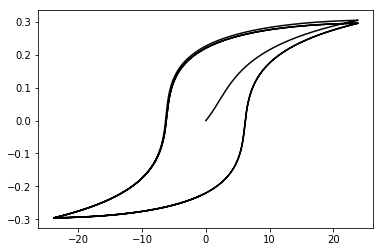

In [4]:
M = jiles_atherton_H(H, t, [alpha, a, Msat, k, c])
B = mu_0*(H[::2]+M)
plt.plot(H[::2], B, color='xkcd:black')
plt.show()

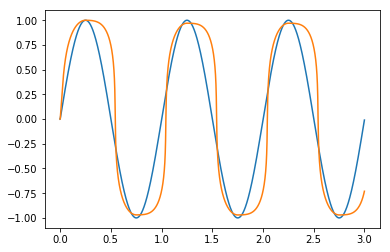

In [5]:
plt.plot(t, H/np.max(H))
plt.plot(t[::2], B/np.max(B))

In [6]:
plt.show()